<a href="https://colab.research.google.com/github/shahtvisha/ImageProcessing/blob/main/ImageStitching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Load images
image1 = cv2.imread('/content/WhatsApp Image 2024-04-10 at 9.31.43 PM(1).jpeg')
image2 = cv2.imread('/content/WhatsApp Image 2024-04-10 at 9.31.43 PM.jpeg')

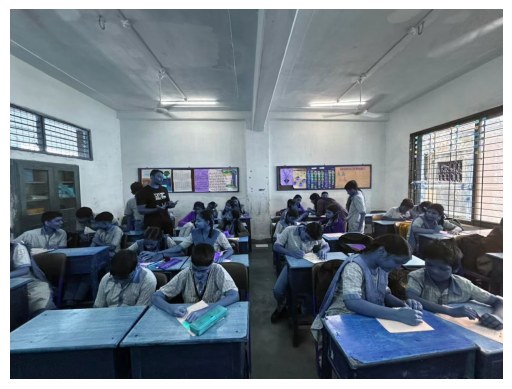

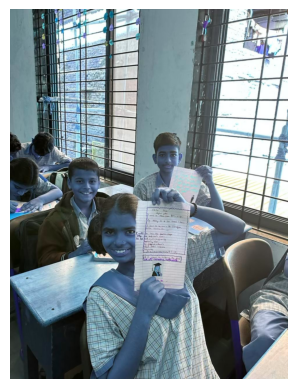

In [19]:
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()


Building functions for stitching from scratch

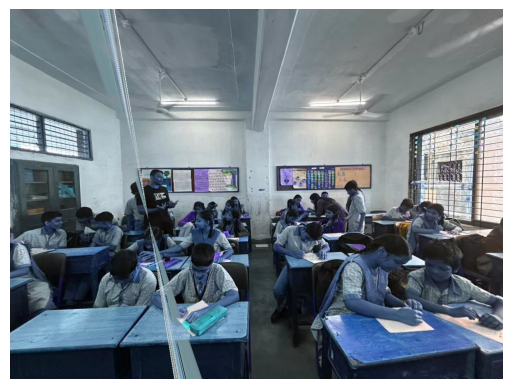

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_homography(matches):
    # Randomly sample 4 points
    src_points = np.float32([match[0] for match in matches])
    dst_points = np.float32([match[1] for match in matches])

    # Estimate homography using RANSAC
    homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC)

    return homography

def warp_image(image, homography, target_size):
    warped_image = cv2.warpPerspective(image, homography, target_size)
    return warped_image


def stitch_images(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Find keypoints and descriptors
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Randomly select matches (for simplicity)
    matches = np.random.choice(matches, min(50, len(matches)), replace=False)

    # Extract matched keypoints
    matched_keypoints1 = np.float32([keypoints1[match.queryIdx].pt for match in matches])
    matched_keypoints2 = np.float32([keypoints2[match.trainIdx].pt for match in matches])

    # Find homography
    homography = find_homography(list(zip(matched_keypoints1, matched_keypoints2)))

    # Warp image2 to align with image1
    warped_image = warp_image(image2, homography, (image1.shape[1], image1.shape[0]))

    # Combine the two images
    stitched_image = np.maximum(image1, warped_image)

    return stitched_image

if image1 is None or image2 is None:
    print("Error: Could not load images.")
else:
    # Convert images to RGB for display
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Stitch images
    result = stitch_images(image1, image2)

    # Display result
    plt.imshow(result, cmap='gray')
    plt.axis('off')
    plt.show()


Changing a few parameters for better homography estimation and stitching process

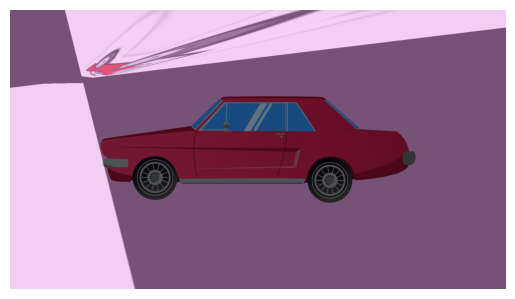

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_homography(matches):
    src_points = np.float32([m[0] for m in matches]).reshape(-1, 1, 2)
    dst_points = np.float32([m[1] for m in matches]).reshape(-1, 1, 2)

    homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC)

    return homography

def warp_image(image, homography, target_size):
    warped_image = cv2.warpPerspective(image, homography, target_size)
    return warped_image

def stitch_images(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Using SIFT for feature detection and matching
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) < 4:
        print("Error: Not enough matches to calculate homography.")
        return None

    matched_keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches])
    matched_keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches])

    homography = find_homography(list(zip(matched_keypoints1, matched_keypoints2)))

    warped_image = warp_image(image2, homography, (image1.shape[1], image1.shape[0]))

    # Blend images
    stitched_image = cv2.addWeighted(image1, 0.5, warped_image, 0.5, 0)

    return stitched_image

# Load images
# image1 = cv2.imread('/content/WhatsApp Image 2024-04-10 at 9.31.43 PM(1).jpeg')
# image2 = cv2.imread('/content/WhatsApp Image 2024-04-10 at 9.31.43 PM.jpeg')
image1=cv2.imread('/content/car1.png')
image2=cv2.imread('/content/car2.jpg')

# Check if images are loaded successfully
if image1 is None or image2 is None:
    print("Error: Could not load images.")
else:
    # Stitch images
    result = stitch_images(image1, image2)
    if result is not None:
        # Display result
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


Using builtin functions

In [12]:
pip install opencv-contrib-python

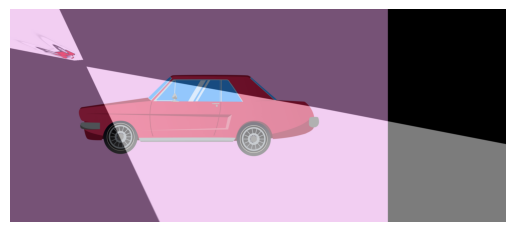

In [17]:
import cv2
import numpy as np

def stitch_images(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Detect keypoints and compute descriptors
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Match descriptors between the two images
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to select good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Homography estimation
    if len(good_matches) > 4:
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        homography, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    else:
        raise ValueError("Not enough matches to compute homography")

    # Warp the second image
    height, width = gray1.shape
    warped_image = cv2.warpPerspective(image2, homography, (width + image2.shape[1], height))

    # Combine the two images
    stitched_image = np.zeros_like(warped_image)
    stitched_image[:height, :width] = image1
    stitched_image = cv2.addWeighted(stitched_image, 0.5, warped_image, 0.5, 0)

    return stitched_image

# Load images
image1=cv2.imread('/content/car1.png')
image2=cv2.imread('/content/car2.jpg')

# Stitch images
result = stitch_images(image1, image2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
